In [8]:
import os
import fileinput

import numpy as np

import scipy.interpolate
import scipy.optimize
from scipy.optimize import curve_fit

import datetime
import time
import signal
import subprocess

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.cm as cm

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

font = {'family' : 'Comic Sans MS',
        'weight' : 'bold',
        'size'   : 18}
plt.rc('font', **font)

In [108]:
class cdat:
    def __init__(self):
        self.name = ''
        self.idx = []
        self.dte = []
        self.con = []
        self.rec = []
        self.ded = []
        self.gf = []
    def gfactor(self):
        if len(self.gf) == 0:
            self.gf = np.zeros_like(self.idx, dtype=float)
            for i in range(1,len(self.idx)):
                if(self.con[i-1] > 0):
                    self.gf[i] = float(self.con[i])/float(self.con[i-1])
        return self.gf

In [109]:
# read in some data
import csv

def readdata_wrd(path, dest):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
    #             print(f'Column names are {", ".join(row)}')
                line_count += 1
            else:
    #             print(row)
                dest.idx.append(line_count)
                line_count += 1
                r = row[0].split('-')
                d = datetime.date(year=int(r[0]), month=int(r[1]),day=int(r[2]))
                dest.dte.append(d)
                dest.con.append(int(row[1]))
                dest.ded.append(int(row[3]))
        print(f'Processed {line_count} lines.')
    dest.name = 'World'
    dest.idx=np.array(dest.idx)
    dest.dte=np.array(dest.dte)
    dest.con=np.array(dest.con)
    dest.ded=np.array(dest.ded)

In [116]:
# read in some data
import csv

def readdata_cnt(path, dest, cntname):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
    #             print(f'Column names are {", ".join(row)}')
                line_count += 1
            elif row[1] == cntname:
    #             print(row)
                dest.idx.append(line_count)
                line_count += 1
                r = row[0].split('-')
                d = datetime.date(year=int(r[0]), month=int(r[1]),day=int(r[2]))
                dest.dte.append(d)
                dest.con.append(int(row[2]))
                dest.ded.append(int(row[4]))
#                 print(d, row[2])
            else:
                pass
        print(f'Processed {line_count} lines.')
    dest.name=cntname
    dest.idx=np.array(dest.idx)
    dest.dte=np.array(dest.dte)
    dest.con=np.array(dest.con)
    dest.ded=np.array(dest.ded)

In [117]:
wrd = cdat()
readdata_wrd('../data/worldwide-aggregated.csv', wrd)

Processed 67 lines.


In [118]:
pl = cdat()
readdata_cnt('../data/countries-aggregated.csv', pl, 'Poland')
it = cdat()
readdata_cnt('../data/countries-aggregated.csv', it, 'Italy')
sp = cdat()
readdata_cnt('../data/countries-aggregated.csv', sp, 'Spain')


Processed 67 lines.
Processed 67 lines.
Processed 67 lines.


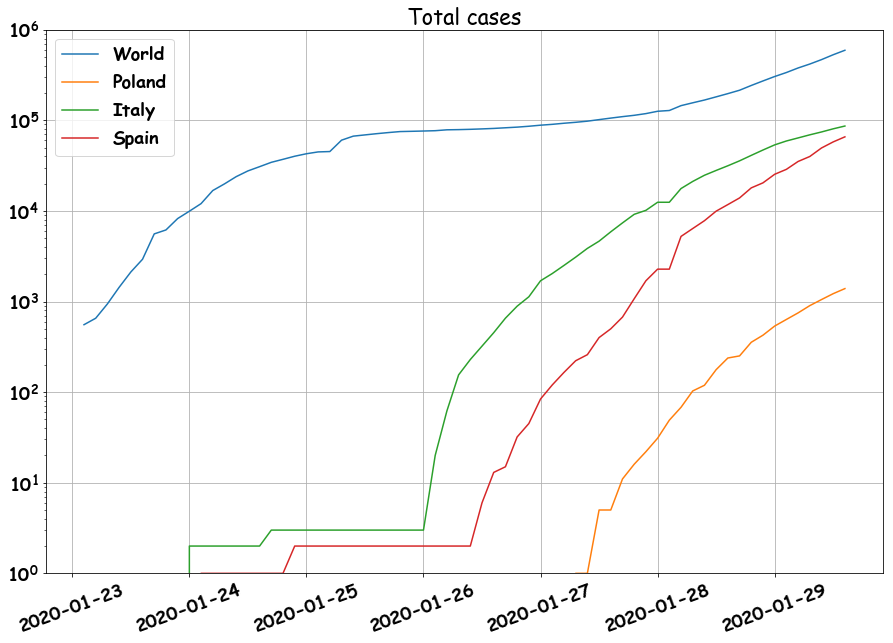

In [119]:
fig, ax = plt.subplots(figsize=(15,10))

plt.plot(wrd.idx, wrd.con, label=wrd.name)
plt.plot(pl.idx, pl.con, label=pl.name)
plt.plot(it.idx, it.con, label=it.name)
plt.plot(sp.idx, sp.con, label=sp.name)

plt.title('Total cases')
plt.yscale('log')
plt.ylim(1,1e6)
plt.legend()
ax.set_xticklabels(dte, rotation=20)
plt.grid()

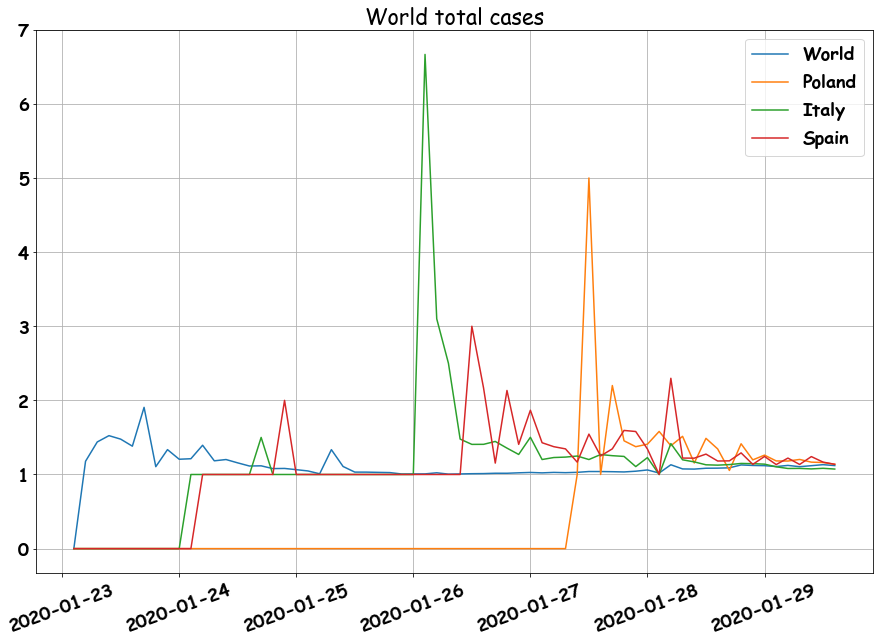

In [124]:
fig, ax = plt.subplots(figsize=(15,10))

plt.plot(wrd.idx, wrd.gfactor(), label=wrd.name)
plt.plot(pl.idx, pl.gfactor(), label=pl.name)
plt.plot(it.idx, it.gfactor(), label=it.name)
plt.plot(sp.idx, sp.gfactor(), label=sp.name)

plt.title('World total cases')
ax.set_xticklabels(dte, rotation=20)
plt.legend()
# plt.xlim(wrd.idx[-10], wrd.idx[-1])
plt.grid()

In [130]:
for d in [wrd, pl, it, sp]:
    av = np.mean([x for x in d.gf if x])
    print(d.name, av)

World 1.1220882101921656
Poland 1.4725834656645436
Italy 1.3027789312492992
Spain 1.2688577061553656
